In [344]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [345]:
# Load Image
def read_file(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    
    plt.show()
    return img

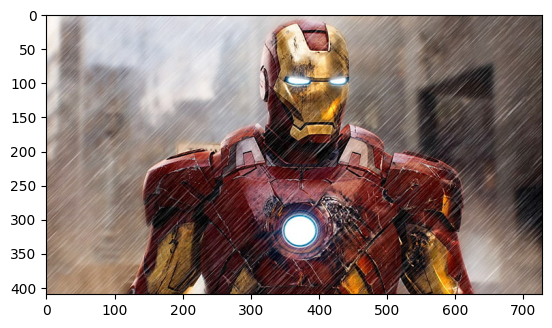

In [346]:
filename = "image4.jpg"
img = read_file(filename)

In [347]:
#Create Edge mark
def edge_mask(img, line_size, blur_val):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_val)
    
    edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                  cv2.THRESH_BINARY, line_size, blur_val)
    
    return edges

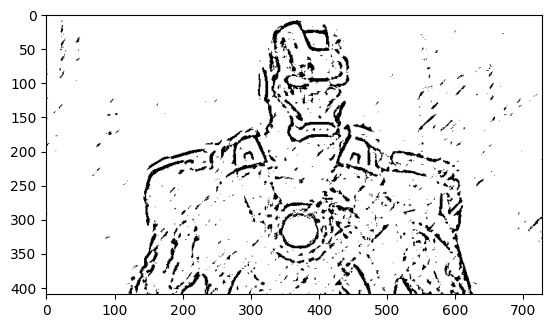

In [348]:
line_size , blur_val = 9, 7
edges = edge_mask(img, line_size, blur_val)
 
plt.imshow(edges, cmap = "gray")
plt.show()

In [349]:
# Reduce the color pelette
def color_quantization(img, k):
    # Transform the image 
    data = np.float32(img).reshape((-1, 3))
    
    #Determine creteria
    criteria = (cv2.TERM_CRITERIA_EPS  + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)
    
    # Implementing K-means clustering   
    ret, label, center=  cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    
    center = np.uint8(center)
    
    result = center[label.flatten()]
    result = result.reshape(img.shape)
    
    return result    

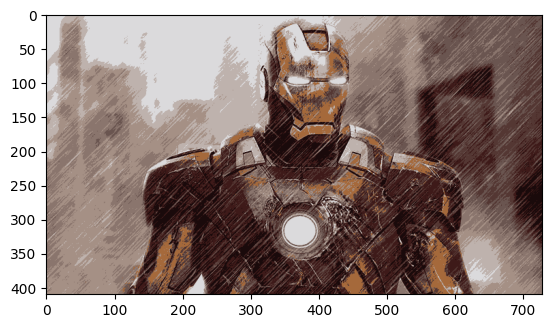

In [350]:
img1 = color_quantization(img, k=9)
# img2 = color_quantization(img, k=7)
# img3 = color_quantization(img, k=2)

plt.imshow(img1)
# plt.imshow(img2)
# plt.imshow(img3)
plt.show()

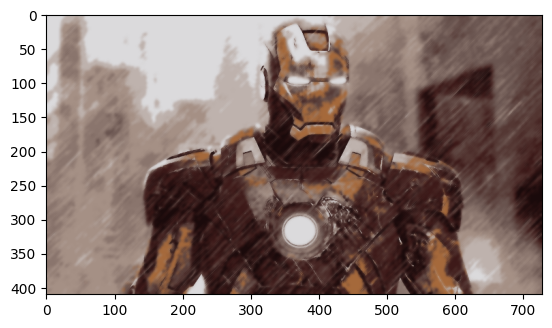

In [351]:
# Reduce Noise
blurred = cv2.bilateralFilter(img1, d = 7, sigmaColor = 200, sigmaSpace = 200)

plt.imshow(blurred)
plt.show()

In [352]:
#combine edge mask with quantized image
def cartoon(blurred):
    c = cv2.bitwise_and(blurred, blurred, mask=edges)
    
    plt.imshow(c)
    plt.show()
    return c
    

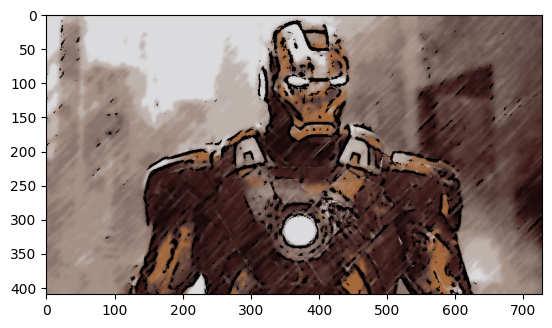

True

In [353]:
out = cartoon(blurred)
out = cv2.cvtColor(out, cv2.COLOR_RGB2BGR)
cv2.imwrite("output4.jpg", out)